# Análisis cualitativo y cuantitativo de los clicks realizados del 5 al 13 de Marzo de 2019

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
clicks = pd.read_csv("clicks.csv", dtype={"source_id":"int8", "advertiser_id":"int8"})

In [3]:
clicks.isnull().sum()

advertiser_id          0
action_id          26351
source_id              0
created                0
country_code           0
latitude               0
longitude              0
wifi_connection        0
carrier_id            11
trans_id               0
os_minor              12
agent_device       23108
os_major              12
specs_brand            0
brand              20116
timeToClick         3374
touchX              3340
touchY              3340
ref_type               0
ref_hash               0
dtype: int64

In [4]:
clicksPosition = clicks[["touchX", "touchY"]]
clicksPosition.head()

,touchX,touchY
0,0.905,0.078
1,NaN,NaN
2,0.946,0.473
3,0.035,0.431
4,0.054,0.423


In [5]:
clicksPosition = clicksPosition.dropna()

In [6]:
clicksPosition['touchY'].max()

16.6

In [7]:
from scipy.stats import gaussian_kde
xPosition = clicksPosition["touchX"].values
yPosition = clicksPosition["touchY"].values

xy = np.vstack([xPosition,yPosition])
z = gaussian_kde(xy)(xy)

## Densidad de clicks en la pantalla

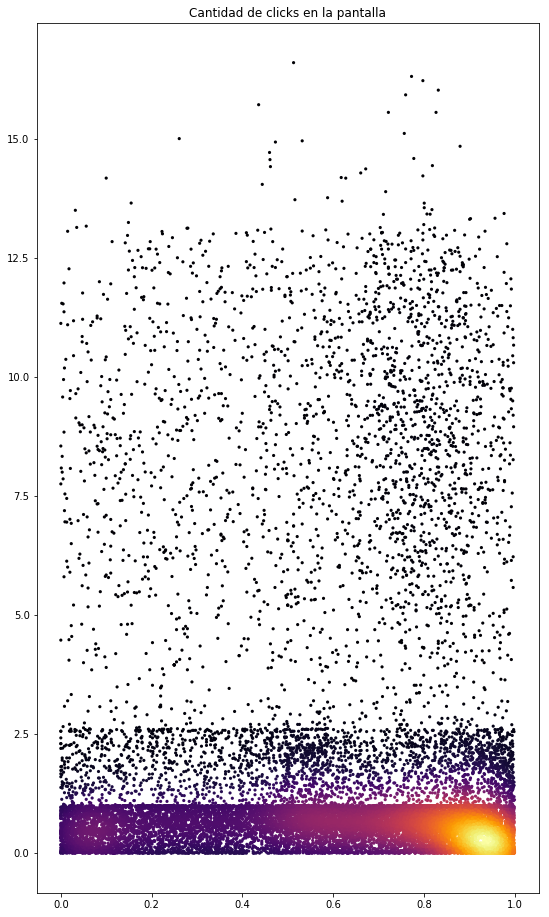

In [12]:
fig, ax = plt.subplots(figsize=(9, 16))
plt.title("Cantidad de clicks en la pantalla")
ax.scatter(xPosition, yPosition, c=z, cmap="inferno", s=10, edgecolor="");
plt.savefig("densidadClicks.png")

## Ploteo del tiempo que tardan el clickear

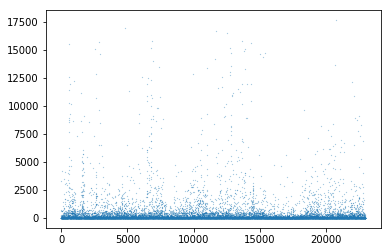

In [20]:
time = clicks["timeToClick"].values
time = time[~np.isnan(time)]
plt.plot(time, ".", markersize=0.3);

### Saqué la media para ver en dónde se ubicaba y sigue siendo alta ( 200 segundos aprox. )

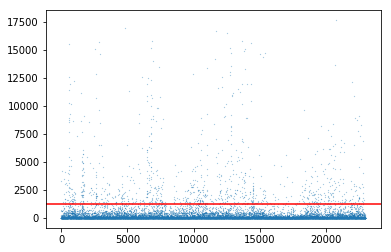

In [18]:
timeStd = np.std(time)
filterTime = time[np.where(time < np.mean(time) + timeStd)]
plt.plot(time, ".", markersize=0.3)
plt.axhline(y=max(filterTime), color="red")

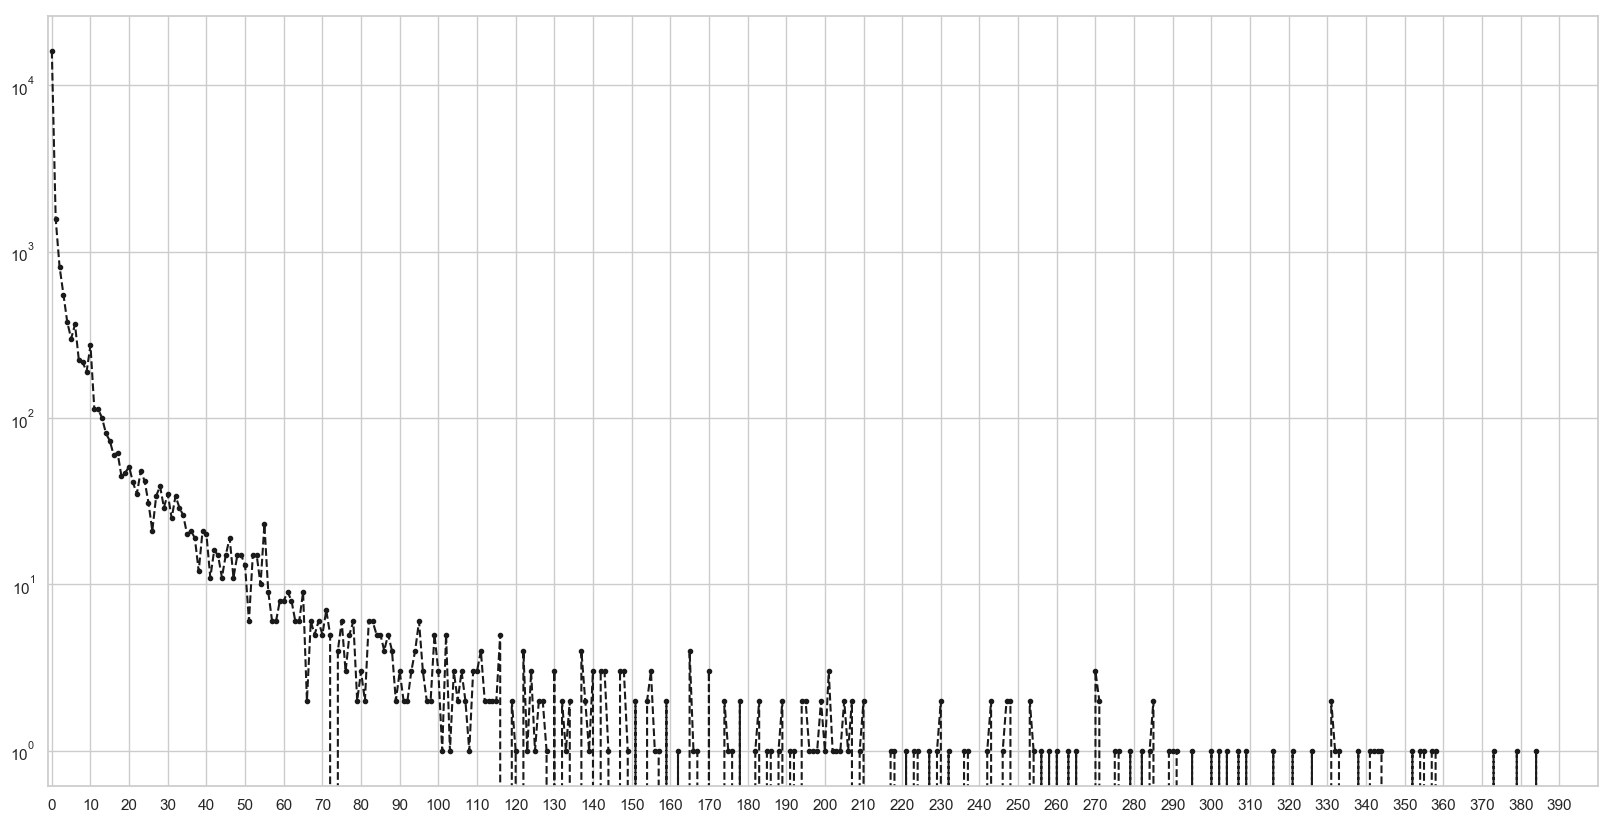

In [31]:
# Figure
fig, ax = plt.subplots(figsize=(20,10))

# Data
N = 400
m = max(time)/N
cantidad_time = []
for n in range(N):
    temp_var = time[np.where(time > n*m)]
    temp_var = temp_var[np.where(temp_var < (n + 1)*m)]
    cantidad_time.append(len(temp_var))

# Axes
ax.set_xticks(np.arange(0,N,10))
ax.set_xlim([-1,N])

# Plot
plt.plot(cantidad_time, "--.k")
plt.yscale("log")

## ¿Cómo fue la evolución de la cantidad de clicks según el tiempo que se tardó en clickear sobre la publicidad?

In [32]:
#Por hacer (ejex-> cant_seg, ejey-> cant_clicks_acumulados hasta esos segundos)

## ¿Cuáles fueron los anunciantes -clientes de Jampp- que recibieron más clicks en sus publicidades?

In [23]:
clicks['cant_clicks'] = 1
group_advertisers = clicks.groupby('advertiser_id').agg({'cant_clicks': 'count'}).reset_index()

Text(0.5, 1.0, 'Cantidad de clicks registrados a cada anunciante')

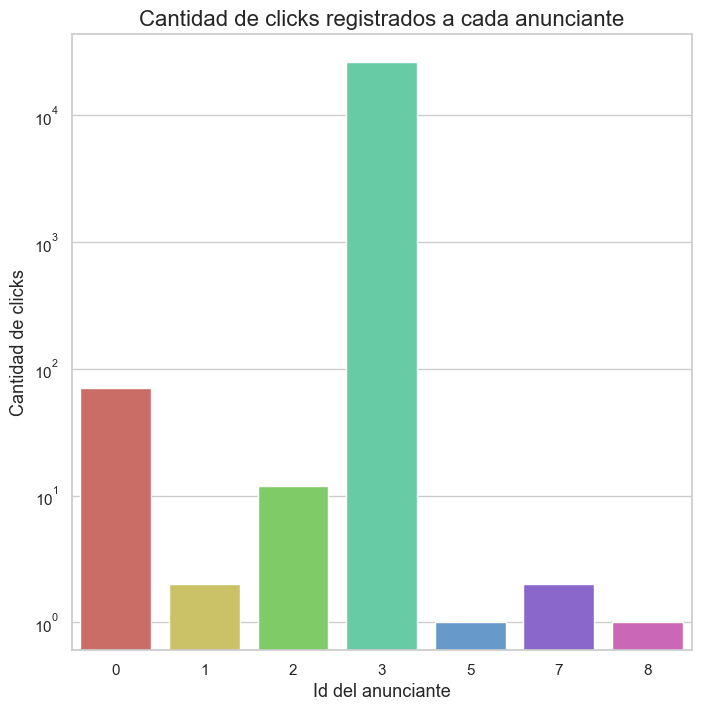

In [37]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (8, 8)

sns.set(style="whitegrid")

graph_clicks = sns.barplot(x= group_advertisers['advertiser_id'], y = group_advertisers['cant_clicks'], orient='v', palette="hls")
graph_clicks.set(yscale="log")
graph_clicks.set_xlabel("Id del anunciante", fontsize = 13)
graph_clicks.set_ylabel("Cantidad de clicks", fontsize = 13)
graph_clicks.set_title("Cantidad de clicks registrados a cada anunciante", fontsize = 16)

## Geográficamente, ¿dónde se producen la mayor cantidad de clicks?

In [ ]:
latitude = df["latitude"].values
longitude = df["longitude"].values

In [ ]:
lat_long = np.vstack([latitude,longitude])
z = gaussian_kde(lat_long)(lat_long)

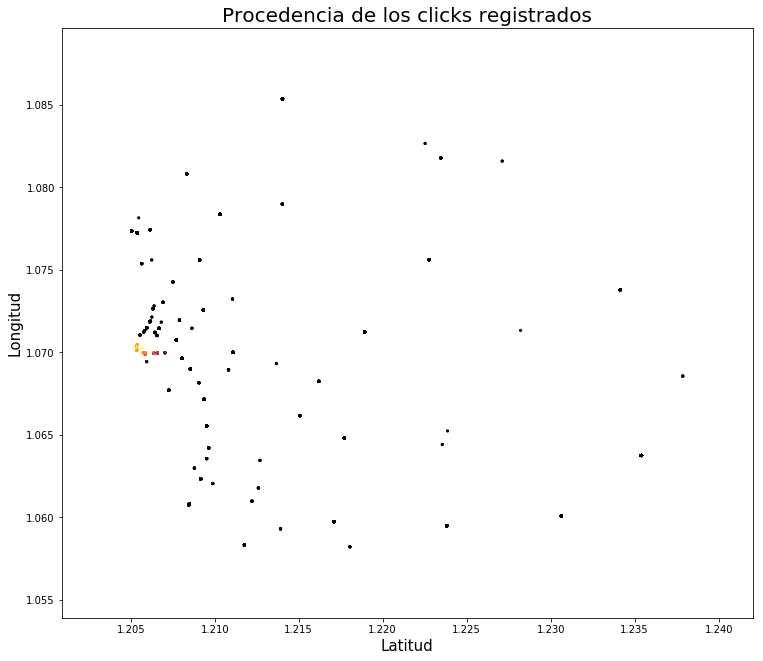

In [15]:
n = 10
fig, ax = plt.subplots(figsize=(n*latitude.max(), n*longitude.max()))
plt.title("Procedencia de los clicks registrados", fontsize = 20)
ax.scatter(latitude, longitude, c=z, cmap="inferno", s=10, edgecolor="");
ax.set_xlabel("Latitud", fontsize = 15)
ax.set_ylabel("Longitud", fontsize = 15)
plt.savefig("latitudLongitud.png")